## Importing the required libraries

In [15]:
import pickle #for reading the given files
import numpy as np 
import cv2 #to read images
import matplotlib.pyplot as plt #to show images and graphs

#importing for our model
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Conv2D, Flatten,MaxPooling2D,Dropout,Activation,BatchNormalization
import tensorflow as tf

## Loading the data

In [2]:
#Opening the pickle files provided and storing them in lists
with open('train_image.pkl', 'rb') as f:
    train = pickle.load(f) #train images
with open('test_image.pkl', 'rb') as f:
    test = pickle.load(f) #test images
with open('train_label.pkl', 'rb') as f:
    train_labels = pickle.load(f) #train labels

In [3]:
#Converting to numpy nd array
train_np = np.array(train)
test_np = np.array(test)
train_labels_np = np.array(train_labels)

In [4]:
train_np.shape,test_np.shape,train_labels_np.shape

((8000, 784), (2000, 784), (8000,))

### reshaping the images in appropriate size (-1,28,28,1)

In [5]:
train_img = train_np.reshape(-1,28,28,1)
test_img = test_np.reshape(-1,28,28,1)

In [6]:
X_train = train_img.astype('float32')
X_test = test_img.astype('float32')
#dividing the image by 255
X_train /= 255
X_test /= 255

#### Converting the labels from 0,2,3,6 to 0,1,2,3

In [8]:
y_train = train_labels_np
for i in range(len(y_train)):
    if(y_train[i] == 0):
        y_train[i] = 0
    elif(y_train[i] == 2):
        y_train[i] = 1
    elif(y_train[i] == 3):
        y_train[i] = 2
    else:
        y_train[i] = 3

In [9]:
y_train[:100]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0])

## Data Augmentation

#### Why Data Augmentation?
Here we are provided a very small dataset. So our model will not be able to learn properly and thus result in very low test accuracy even though the train accuracy may me high(over fitting).

So, to improve the learning of our model, we need to feed it more data. We can do so by altering the data that is already provided to us.

There are various data augmentation techniques like **Flipping the image**, **rotating the image**, **changing the image's orientation, cropping, translation,etc**

Here we are going to use 2 of the above techniqes:
1) Rotation
2) Flipping 

### 1) Rotation
library used: numpy

code : **np.rot90(img,k)**, where k = number of 90 degree rotations

In [10]:
x_t = list(X_train) 
y_t = list(y_train)
x_t_len = len(x_t)
for i in range(x_t_len):
    img = x_t[i] 
    rot = np.rot90(img,1) #rotating the image
    x_t.append(rot) #appending flipped image to the list
    y_t.append(y_t[i]) #adding the image label
    
print(len(x_t))
X_train = np.array(x_t) #converting to numpy
y_train = np.array(y_t) #converting to numpy

16000


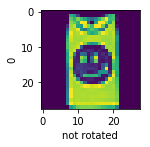

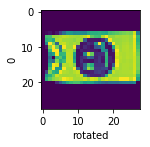

In [11]:
#checking whether the rotation is successful or not

img = X_train[12].reshape(28,28)
img1 = X_train[8012].reshape(28,28)
flip = np.fliplr(img)
plt.subplot(2,1,1)
plt.imshow(img)
plt.xlabel('not rotated')
plt.ylabel(y_train[12])
plt.show()
plt.subplot(2,2,2)
plt.imshow(img1)
plt.xlabel("rotated")
plt.ylabel(y_train[8012])
plt.show()

### 2) Flipping

library used: numpy

code: **np.fliplr(img)**

In [12]:
x_t = list(X_train)
y_t = list(y_train)
x_t_len = len(x_t)
for i in range(x_t_len):
    img = x_t[i]
    flip = np.fliplr(img) #flipping the image
    x_t.append(flip) #appending flipped image to the list
    y_t.append(y_t[i]) #adding the image label
    
print(len(x_t))
X_train = np.array(x_t) #converting to np array
y_train = np.array(y_t) #converting to np array

32000


#### One hot encoding the data

In [13]:
#one-hot encoding the labels
from keras.utils import to_categorical
y_train = to_categorical(y_train)
y_train.shape

(32000, 4)

In [14]:
from sklearn.model_selection import train_test_split
X_train,X_val,Y_train,Y_val = train_test_split(X_train,y_train,test_size=0.15)
X_train.shape,X_val.shape,Y_train.shape,Y_val.shape

((27200, 28, 28, 1), (4800, 28, 28, 1), (27200, 4), (4800, 4))

# Model

## Library used to create model: Keras

We are going to create a deep learning model. We are going to use **Convolutional Neural Network(CNN)** as they are highly effective on images and give excellent results on image classification

## Our architecture: 
<ul><li> input image: 28x28x1 image</li></ul>
<ol>
<li>**Convolution layer**: filter: 3*3, units: 64, strides=1,padding: SAME (i.e image size remains same) </li>
<ul><li> output of this layer: 28x28x64</li></ul><br/>
<li>**Batch normalization**: for normalizing the output</li>
<li>**Maxpool layer**: filter:2x2,strides=2</li>
<ul><li> output of this layer: 14x14x64</li></ul><br/>
<li>**Convolution layer**: filter: 3*3, units: 128, padding: SAME (i.e image size remains same)</li>
<li>**Batch normalization**: for normalizing the output</li>
<ul><li> output of this layer: 14x14x128</li></ul><br/>
<li>**Maxpool layer**: filter:2x2,strides=2</li>
<ul><li> output of this layer: 7x7x128</li></ul><br/>
<li>**Dropout layer**: FOR REGULARIZATION(i.e prevent overfitting)</li>

<li>**Convolution layer**: filter: 3*3, units: 256, padding: SAME (i.e image size remains same)</li>
<li>**Batch normalization**: for normalizing the output</li>
<ul><li> output of this layer: 7x7x128</li></ul><br/>
<li>**Maxpool layer**: filter:2x2,strides=2</li>
<ul><li> output of this layer: 3x3x128</li></ul><br/>

<li>**Flatten**: Now we flatten the array to pass it through the neural network</li>
<li>**Dense layer**: 1024 units, activation: relu</li>
<li>**Output layer**: units: 4,activation: softmax</li>
</ol>

In [16]:
#creating a model
model = Sequential()

In [17]:
model.add(Conv2D(64,(3,3),padding='same',activation='relu',input_shape = (28,28,1)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=None,padding='valid',data_format=None))

model.add(Conv2D(128,(3,3),padding='same',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=None,padding='valid',data_format=None))
model.add(Dropout(0.2, noise_shape=None, seed=None))

model.add(Conv2D(256,(3,3),padding='same',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=None,padding='valid',data_format=None))

model.add(Flatten())
model.add(Dense(1024,activation='relu'))
model.add(Dense(4,activation=tf.nn.softmax))

In [18]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 64)        640       
_________________________________________________________________
batch_normalization_1 (Batch (None, 28, 28, 64)        256       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 128)       73856     
_________________________________________________________________
batch_normalization_2 (Batch (None, 14, 14, 128)       512       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 128)         0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 7, 7, 128)         0         
__________

In [19]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [20]:
#train the model
model.fit(X_train, Y_train,validation_data=(X_val,Y_val), epochs=10)

Train on 27200 samples, validate on 4800 samples
Epoch 1/10
27200/27200 [==============================] - 274s 10ms/step - loss: 0.8656 - acc: 0.7618 - val_loss: 0.5132 - val_acc: 0.7973
Epoch 2/10
27200/27200 [==============================] - 288s 11ms/step - loss: 0.3943 - acc: 0.8425 - val_loss: 0.3961 - val_acc: 0.8490
Epoch 3/10
27200/27200 [==============================] - 268s 10ms/step - loss: 0.3348 - acc: 0.8679 - val_loss: 0.3480 - val_acc: 0.8665
Epoch 4/10
27200/27200 [==============================] - 275s 10ms/step - loss: 0.2989 - acc: 0.8835 - val_loss: 0.3548 - val_acc: 0.8627
Epoch 5/10
27200/27200 [==============================] - 267s 10ms/step - loss: 0.2584 - acc: 0.8993 - val_loss: 0.3909 - val_acc: 0.8638
Epoch 6/10
27200/27200 [==============================] - 271s 10ms/step - loss: 0.2336 - acc: 0.9097 - val_loss: 0.3948 - val_acc: 0.8696
Epoch 7/10
27200/27200 [==============================] - 273s 10ms/step - loss: 0.2037 - acc: 0.9214 - val_loss: 0.3

### Testing data


In [22]:
X_test.shape

(2000, 28, 28, 1)

### Prediction

In [23]:
predictions = model.predict(X_test)
predictions.shape

(2000, 4)

In [35]:
#choosing the max argument
y_pred = np.argmax(predictions,axis=1)
y_pred.shape,set(y_pred)

((2000,), {0, 1, 2, 3})

### Converting the classes back to their original labels

In [39]:
for i in range(y_pred.shape[0]):
    if(y_pred[i] == 0):
        y_pred[i] = 0
    elif(y_pred[i] == 1):
        y_pred[i] = 2
    elif(y_pred[i] == 2):
        y_pred[i] = 3
    else:
        y_pred[i] = 6

## Saving the result

In [55]:
import pandas as pd
ans = np.zeros((y_pred.shape[0],2))
for i in range(y_pred.shape[0]):
    ans[i][0] = i
    ans[i][1] = y_pred[i]
pd.DataFrame(ans).to_csv('Vibhu_Sehra.csv',header = ['image_index','class'],index = False)